# Importing Pandas

In [75]:
import pandas as pd

# Importing data

In [76]:
names = ['id','title','year','rating','votes','length','genres']
data = pd.read_csv('imdb_top_10000.txt', sep="\t", names=names, index_col=0)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, tt0111161 to tt0279977
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   10000 non-null  object 
 1   year    10000 non-null  int64  
 2   rating  10000 non-null  float64
 3   votes   10000 non-null  int64  
 4   length  10000 non-null  object 
 5   genres  9999 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 546.9+ KB


# Exporting it into CSV

In [78]:
data.to_csv('test.csv' ,header=True, index=True, sep=',')

# Sorting data

In [79]:
data.sort_values(by='rating')

,title,year,rating,votes,length,genres
id,,,,,,
tt0270846,Superbabies: Baby Geniuses 2 (2004),2004,1.5,13196,88 mins.,Comedy|Family
tt0059464,Monster a-Go Go (1965),1965,1.5,3255,70 mins.,Sci-Fi|Horror
tt0364986,Ben & Arthur (2002),2002,1.5,4675,85 mins.,Drama|Romance
tt0421051,Daniel the Wizard (2004),2004,1.5,8271,81 mins.,Comedy|Crime|Family|Fantasy|Horror
tt1309000,Dream Well (2009),2009,1.5,2848,00 mins.,Comedy|Romance|Sport
...,...,...,...,...,...,...
tt0071562,The Godfather: Part II (1974),1974,9.0,291169,200 mins.,Crime|Drama
tt0060196,"The Good, the Bad and the Ugly (1966)",1966,9.0,195238,161 mins.,Western
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller


In [80]:
data.sort_values(by='votes', ascending=False)

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0468569,The Dark Knight (2008),2008,8.9,555122,152 mins.,Action|Crime|Drama|Thriller
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
tt0068646,The Godfather (1972),1972,9.2,474189,175 mins.,Crime|Drama
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
...,...,...,...,...,...,...
tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance
tt0076391,Mimino (1977),1977,8.2,1356,97 mins.,Comedy


In [81]:
sample_data ={
    'colors': ['blue','red','green'],
    'styles': ['curly','straight' ,'fine'],
    'look': ['georgeous','fine','nice']
}

# Data Frames

In [82]:
data2 = pd.DataFrame(sample_data)

In [83]:
data2

,colors,styles,look
0,blue,curly,georgeous
1,red,straight,fine
2,green,fine,nice


In [84]:
data['length'].value_counts(ascending=True).sort_index(ascending=False)

length
99 mins.     235
98 mins.     279
97 mins.     261
96 mins.     267
95 mins.     308
            ... 
103 mins.    238
102 mins.    212
101 mins.    223
100 mins.    300
00 mins.     282
Name: count, Length: 162, dtype: int64

# Metplotlib

In [85]:
%matplotlib inline

<Axes: xlabel='id'>

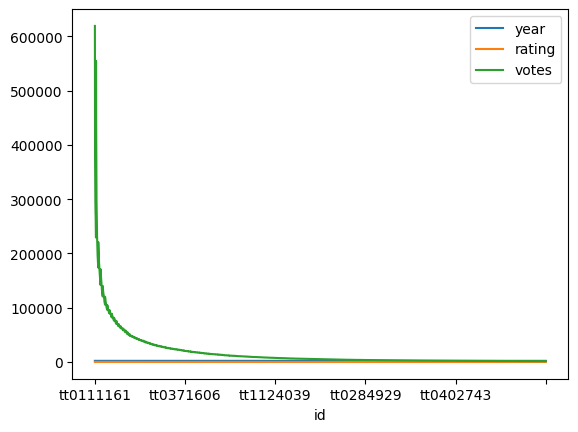

In [86]:
data.plot()

<Axes: ylabel='Frequency'>

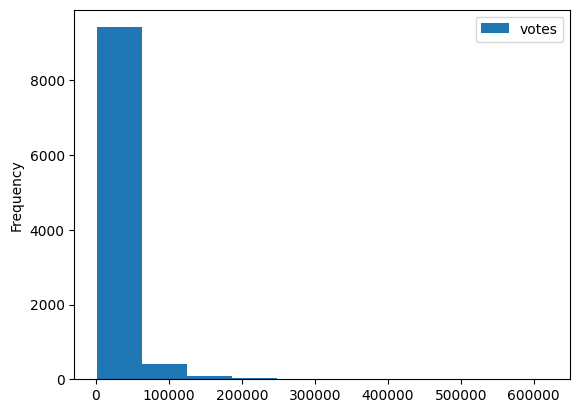

In [87]:
data.plot(kind='hist', x='rating', y= 'votes')

<Axes: xlabel='rating', ylabel='votes'>

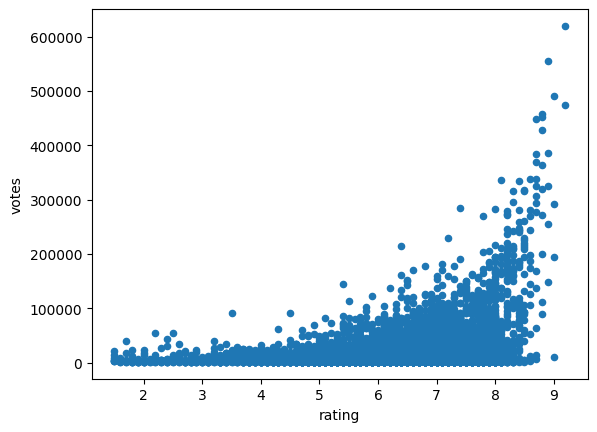

In [88]:
data.plot(kind='scatter', x='rating', y= 'votes')

# Seaborn

In [89]:
import seaborn as sns

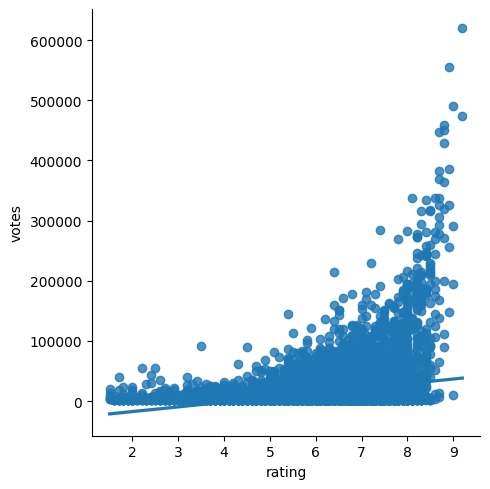

In [90]:
sns.lmplot(x='rating', y='votes', data=data)

# Pair Ploting using seaborn

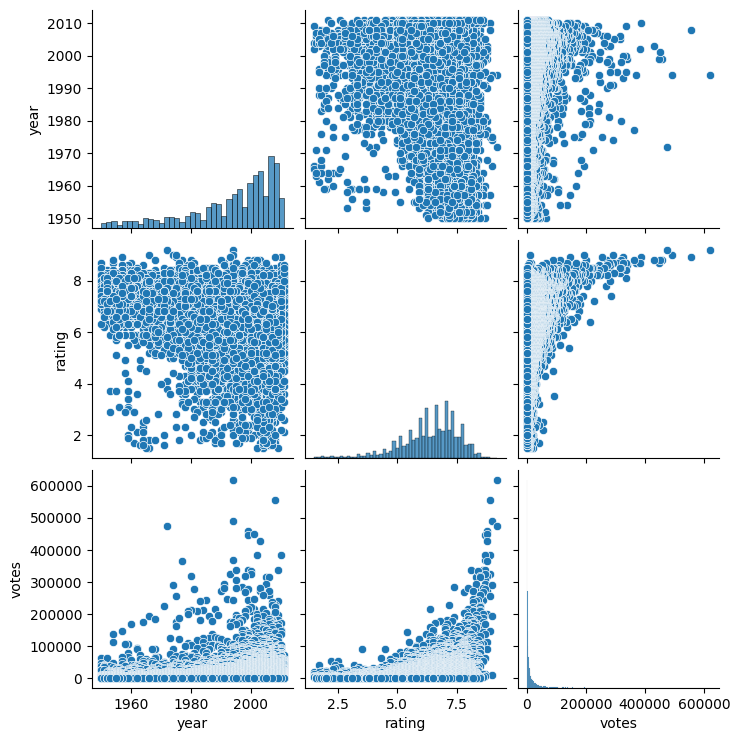

In [91]:
sns.pairplot(data)

# Ordinary Least Squares(OLS) Regression

In [92]:
import statsmodels.api as sm

In [93]:
results = sm.OLS(data['votes'], data['rating']).fit()

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  votes   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              2829.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):                        0.00
Time:                        10:02:11   Log-Likelihood:                     -1.1849e+05
No. Observations:               10000   AIC:                                  2.370e+05
Df Residuals:                    9999   BIC:                                  2.370e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rating      2771.9868     52.115     53.190      0.000    2669.831    2874.143
==============================================================================
Omnibus:                    11448.927   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297144.076
Skew:                           5.966   Prob(JB):                         0.00
Kurtosis:                      57.505   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Advanced Data Ploting

In [99]:
data[data['year'] > 1995]

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0499549,Avatar (2009),2009,8.1,336855,162 mins.,Action|Adventure|Fantasy|Sci-Fi
...,...,...,...,...,...,...
tt0118635,Aprile (1998),1998,6.7,1358,78 mins.,Comedy
tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance


In [103]:
data[(data['year'] > 1995) & (data['year'] < 2000)]

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0120338,Titanic (1997),1997,7.4,284245,194 mins.,Adventure|Drama|History|Romance
tt0167404,The Sixth Sense (1999),1999,8.2,278210,107 mins.,Drama|Mystery|Thriller
...,...,...,...,...,...,...
tt0117690,Some Mother's Son (1996),1996,7.3,1371,112 mins.,Drama
tt0289424,The Ring Virus (1999),1999,6.5,1371,108 mins.,Horror
tt0197094,What Becomes of the Broken Hearted? (1999),1999,6.3,1365,00 mins.,Drama


In [104]:
data[(data['year'] > 1995) & (data['year'] < 2000)].sort_values(by='rating', ascending =False).head(10)

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt0120586,American History X (1998),1998,8.6,270082,119 mins.,Crime|Drama
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0118799,Life Is Beautiful (1997),1997,8.5,131578,116 mins.,Comedy|Drama|Romance|War
tt0120815,Saving Private Ryan (1998),1998,8.5,317912,169 mins.,Action|Drama|History|War
tt0119488,L.A. Confidential (1997),1997,8.4,187115,138 mins.,Crime|Drama|Mystery|Thriller
tt0119698,Princess Mononoke (1997),1997,8.4,77859,134 mins.,Animation|Adventure|Fantasy
tt0120689,The Green Mile (1999),1999,8.4,243660,189 mins.,Crime|Drama|Fantasy|Mystery


In [106]:
data.groupby(data['year'])['rating'].mean()

year
1950    7.545161
1951    7.478125
1952    7.475676
1953    7.106383
1954    7.371795
          ...   
2007    6.303831
2008    6.275260
2009    6.287290
2010    6.340635
2011    6.357143
Name: rating, Length: 62, dtype: float64

In [107]:
data.groupby(data['year'])['rating'].min()

year
1950    6.3
1951    6.2
1952    6.3
1953    2.9
1954    6.1
       ... 
2007    1.6
2008    1.7
2009    1.5
2010    2.2
2011    2.1
Name: rating, Length: 62, dtype: float64

In [108]:
data.groupby(data['year'])['rating'].max()

year
1950    8.7
1951    8.3
1952    8.4
1953    8.3
1954    8.8
       ... 
2007    8.3
2008    8.9
2009    8.4
2010    8.9
2011    8.6
Name: rating, Length: 62, dtype: float64